In [1]:
# import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns

sns.set()

In [2]:
# Read the wrangled csv file as dataframe: titles_crew_pre
titles_crew_pre=pd.read_csv('title.csv').drop(['Unnamed: 0'],axis=1)
titles_crew_pre.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,title,region,language,averageRating,numVotes,nconst,category,primaryName,birthYear,deathYear,primaryProfession
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,73337,nm0107463,editor,David Brenner,NaN,NaN,"editor,editorial_department"
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,73337,nm0000212,actress,Meg Ryan,1961.0,NaN,"actress,producer,soundtrack"
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,73337,nm0413168,actor,Hugh Jackman,1968.0,NaN,"actor,soundtrack,producer"
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,73337,nm0000630,actor,Liev Schreiber,1967.0,NaN,"actor,producer,miscellaneous"
4,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,73337,nm0005227,actor,Breckin Meyer,1974.0,NaN,"actor,writer,producer"


In [3]:
titles_crew_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432774 entries, 0 to 432773
Data columns (total 18 columns):
tconst               432774 non-null object
titleType            432774 non-null object
primaryTitle         432774 non-null object
originalTitle        432774 non-null object
startYear            432774 non-null int64
runtimeMinutes       397811 non-null float64
genres               423921 non-null object
title                432774 non-null object
region               432774 non-null object
language             2591 non-null object
averageRating        432774 non-null float64
numVotes             432774 non-null int64
nconst               432774 non-null object
category             432774 non-null object
primaryName          432722 non-null object
birthYear            164454 non-null float64
deathYear            20952 non-null float64
primaryProfession    418500 non-null object
dtypes: float64(4), int64(2), object(12)
memory usage: 59.4+ MB


In [4]:
# Create a new dataset from titles_crew containing single row for each movie title: t
t=titles_crew_pre.iloc[:,[0,4,5,6,10,11]].drop_duplicates()

# Add a column for rounded value of average rating for each movie
t['roundRating']=t['averageRating'].round() 
t.head()

,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes,roundRating
0,tt0035423,2001,118.0,"Comedy,Fantasy,Romance",6.4,73337,6.0
10,tt0059900,1990,78.0,"Drama,Fantasy",6.8,21,7.0
20,tt0064820,1989,81.0,Comedy,6.9,269,7.0
29,tt0067100,1981,77.0,"Action,Drama,Thriller",5.7,374,6.0
39,tt0067460,1985,85.0,"Documentary,Sport",8.1,10,8.0


In [5]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49440 entries, 0 to 432766
Data columns (total 7 columns):
tconst            49440 non-null object
startYear         49440 non-null int64
runtimeMinutes    45124 non-null float64
genres            48231 non-null object
averageRating     49440 non-null float64
numVotes          49440 non-null int64
roundRating       49440 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.0+ MB


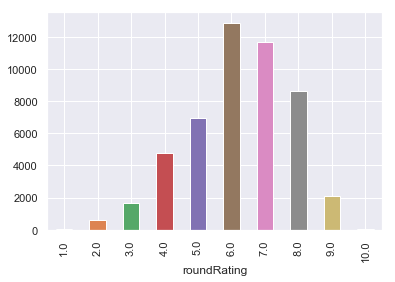

In [6]:
# Plot a graph of ratings for all the movies for all years under consideration
t.groupby('roundRating')['tconst'].count().plot(kind='bar')

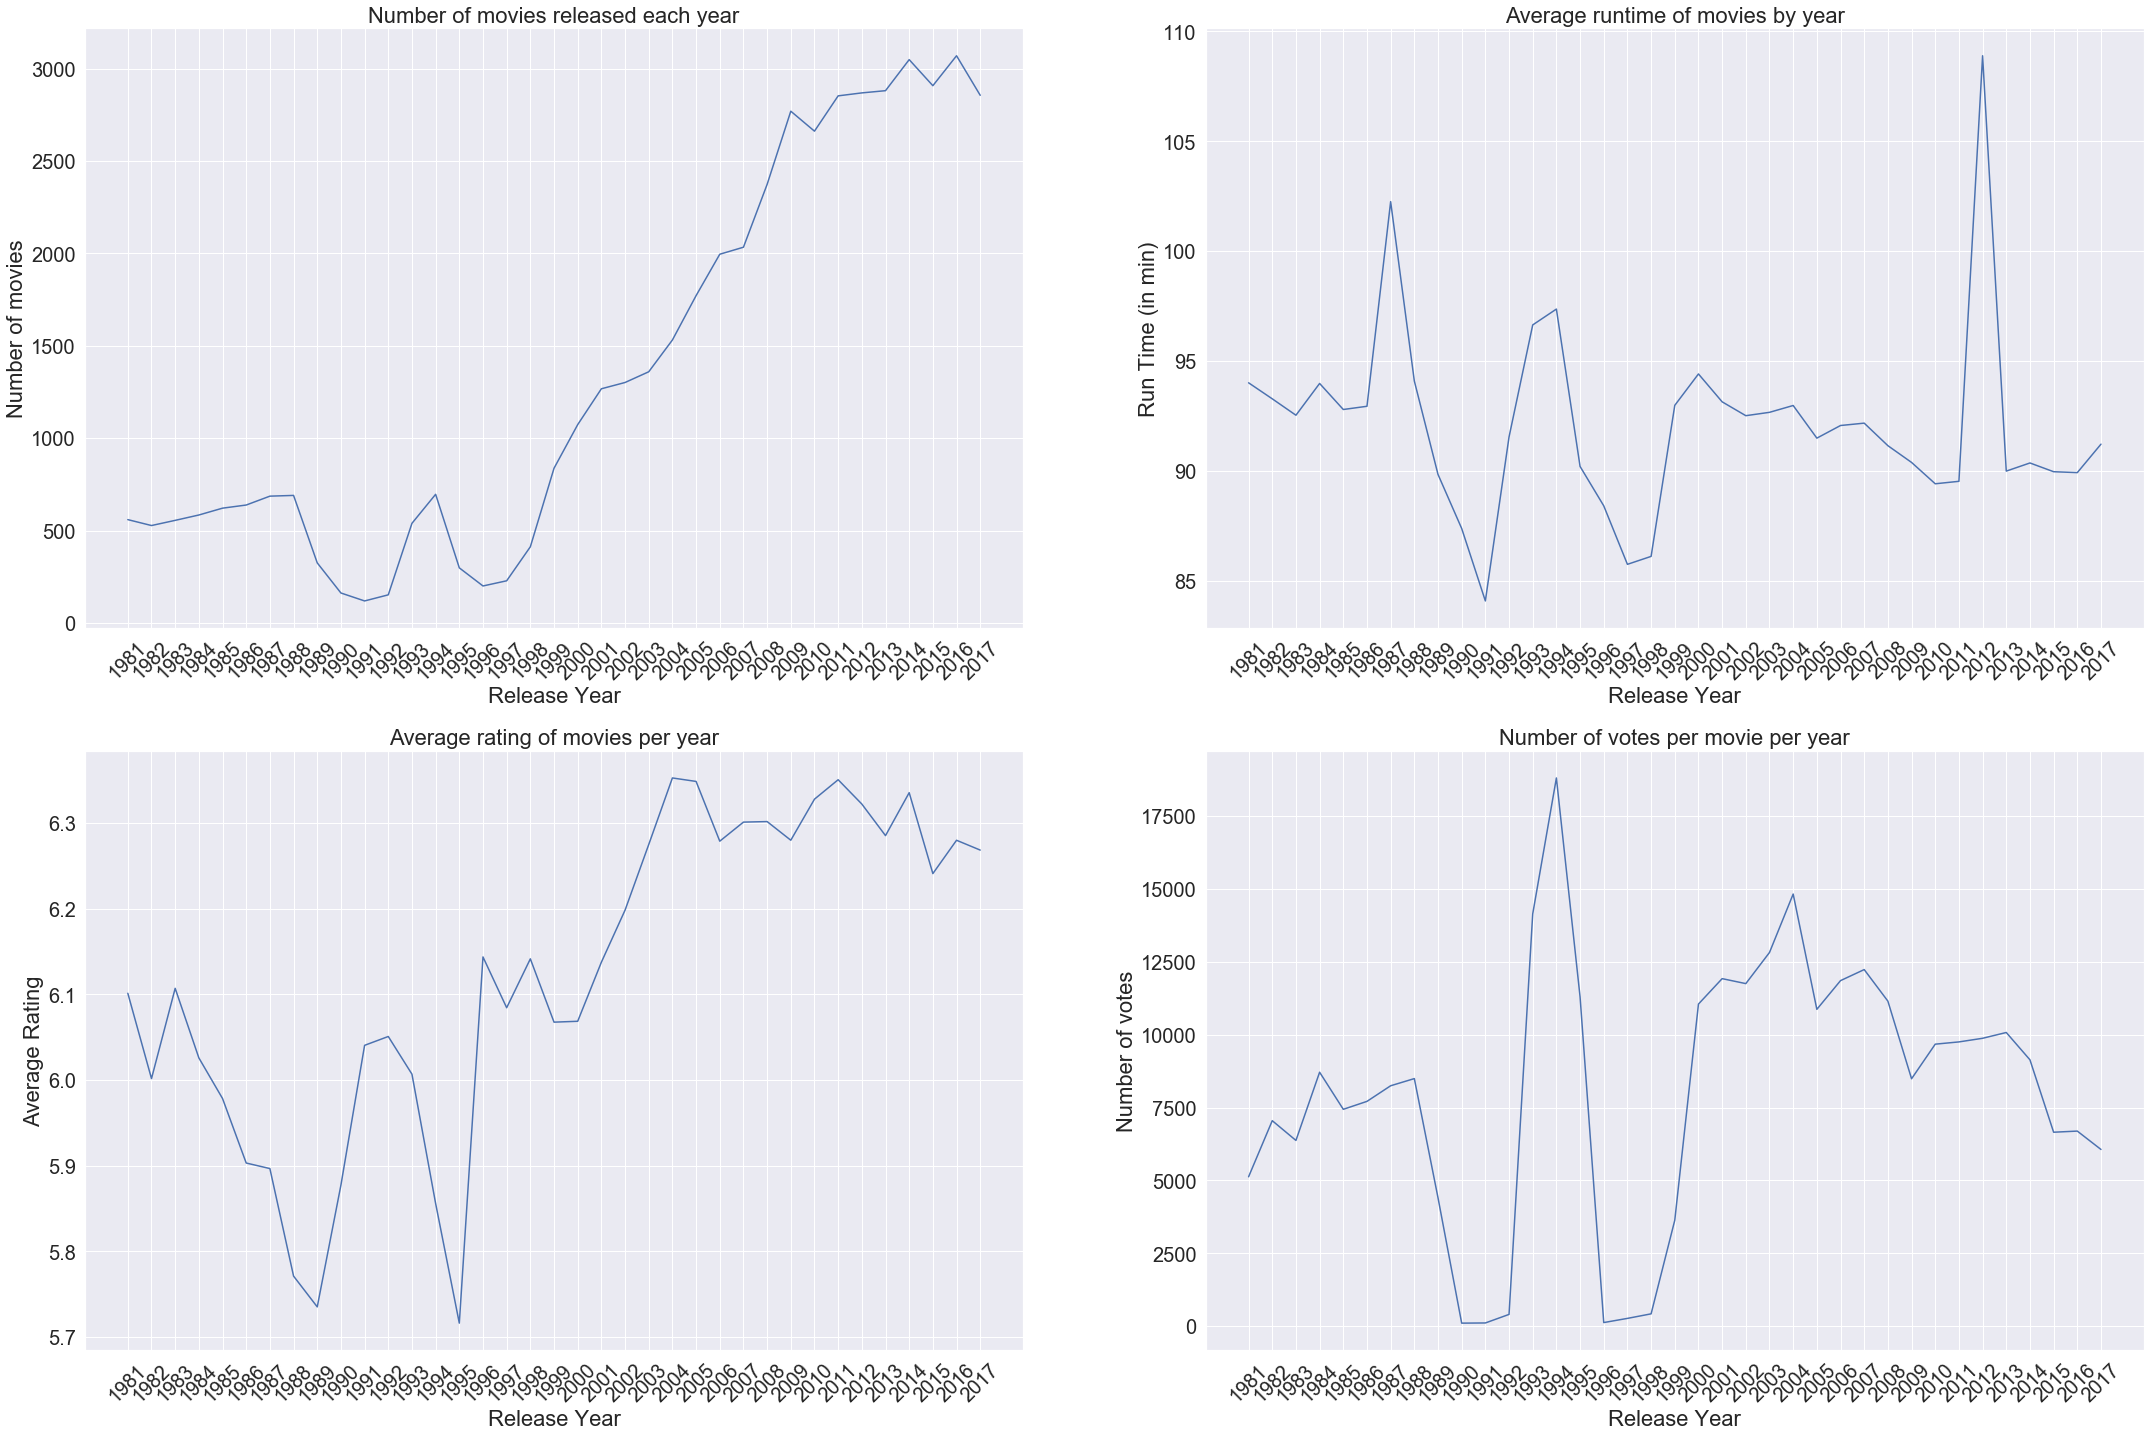

In [43]:
# Yearwise trends for different features

plt.figure(figsize=(30,20))
plt.rcParams.update({'font.size': 22})
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)


plt.subplot(2,2,2)
t.groupby('startYear')['runtimeMinutes'].mean().plot()
plt.ylabel('Run Time (in min)',fontsize=22)
plt.xlabel('Release Year',fontsize=22)
plt.xticks(np.arange(min(t['startYear']), max(t['startYear'])+1, 1.0),rotation=45)
plt.title('Average runtime of movies by year',fontsize=22)

plt.subplot(2,2,1)
t.groupby('startYear')['tconst'].count().plot()
plt.xlabel('Release Year',fontsize=22)
plt.ylabel('Number of movies',fontsize=22)
plt.xticks(np.arange(min(t['startYear']), max(t['startYear'])+1, 1.0),rotation=45)
plt.title('Number of movies released each year',fontsize=22)

plt.subplot(2,2,3)
t.groupby('startYear')['averageRating'].mean().plot()
plt.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)
plt.xlabel('Release Year',fontsize=22)
plt.ylabel('Average Rating',fontsize=22)
plt.xticks(np.arange(min(t['startYear']), max(t['startYear'])+1, 1.0),rotation=45)
plt.title('Average rating of movies per year',fontsize=22)

plt.subplot(2,2,4)
t.groupby('startYear')['numVotes'].mean().plot()
plt.xlabel('Release Year',fontsize=22)
plt.ylabel('Number of votes',fontsize=22)
plt.title('Number of votes per movie per year',fontsize=22)
plt.xticks(np.arange(min(t['startYear']), max(t['startYear'])+1, 1.0),rotation=45)

plt.tight_layout(pad=.4, w_pad=4.0, h_pad=1.0)



In [8]:
# Calculate number of movies (cumulative) against number of votes
t[t.numVotes<=100].groupby('numVotes')['tconst'].count().cumsum()

numVotes
5       1343
6       2894
7       4254
8       5462
9       6511
10      7451
11      8335
12      9164
13      9940
14     10669
15     11317
16     11912
17     12469
18     12962
19     13435
20     13921
21     14343
22     14757
23     15142
24     15520
25     15893
26     16205
27     16546
28     16878
29     17172
30     17472
31     17761
32     18017
33     18259
34     18501
       ...  
71     24022
72     24131
73     24224
74     24302
75     24388
76     24491
77     24586
78     24659
79     24751
80     24828
81     24920
82     24998
83     25088
84     25162
85     25236
86     25319
87     25406
88     25493
89     25564
90     25640
91     25712
92     25770
93     25833
94     25872
95     25937
96     26012
97     26086
98     26148
99     26213
100    26279
Name: tconst, Length: 96, dtype: int64

Text(0.5,1,'Max runtime of movies by year')

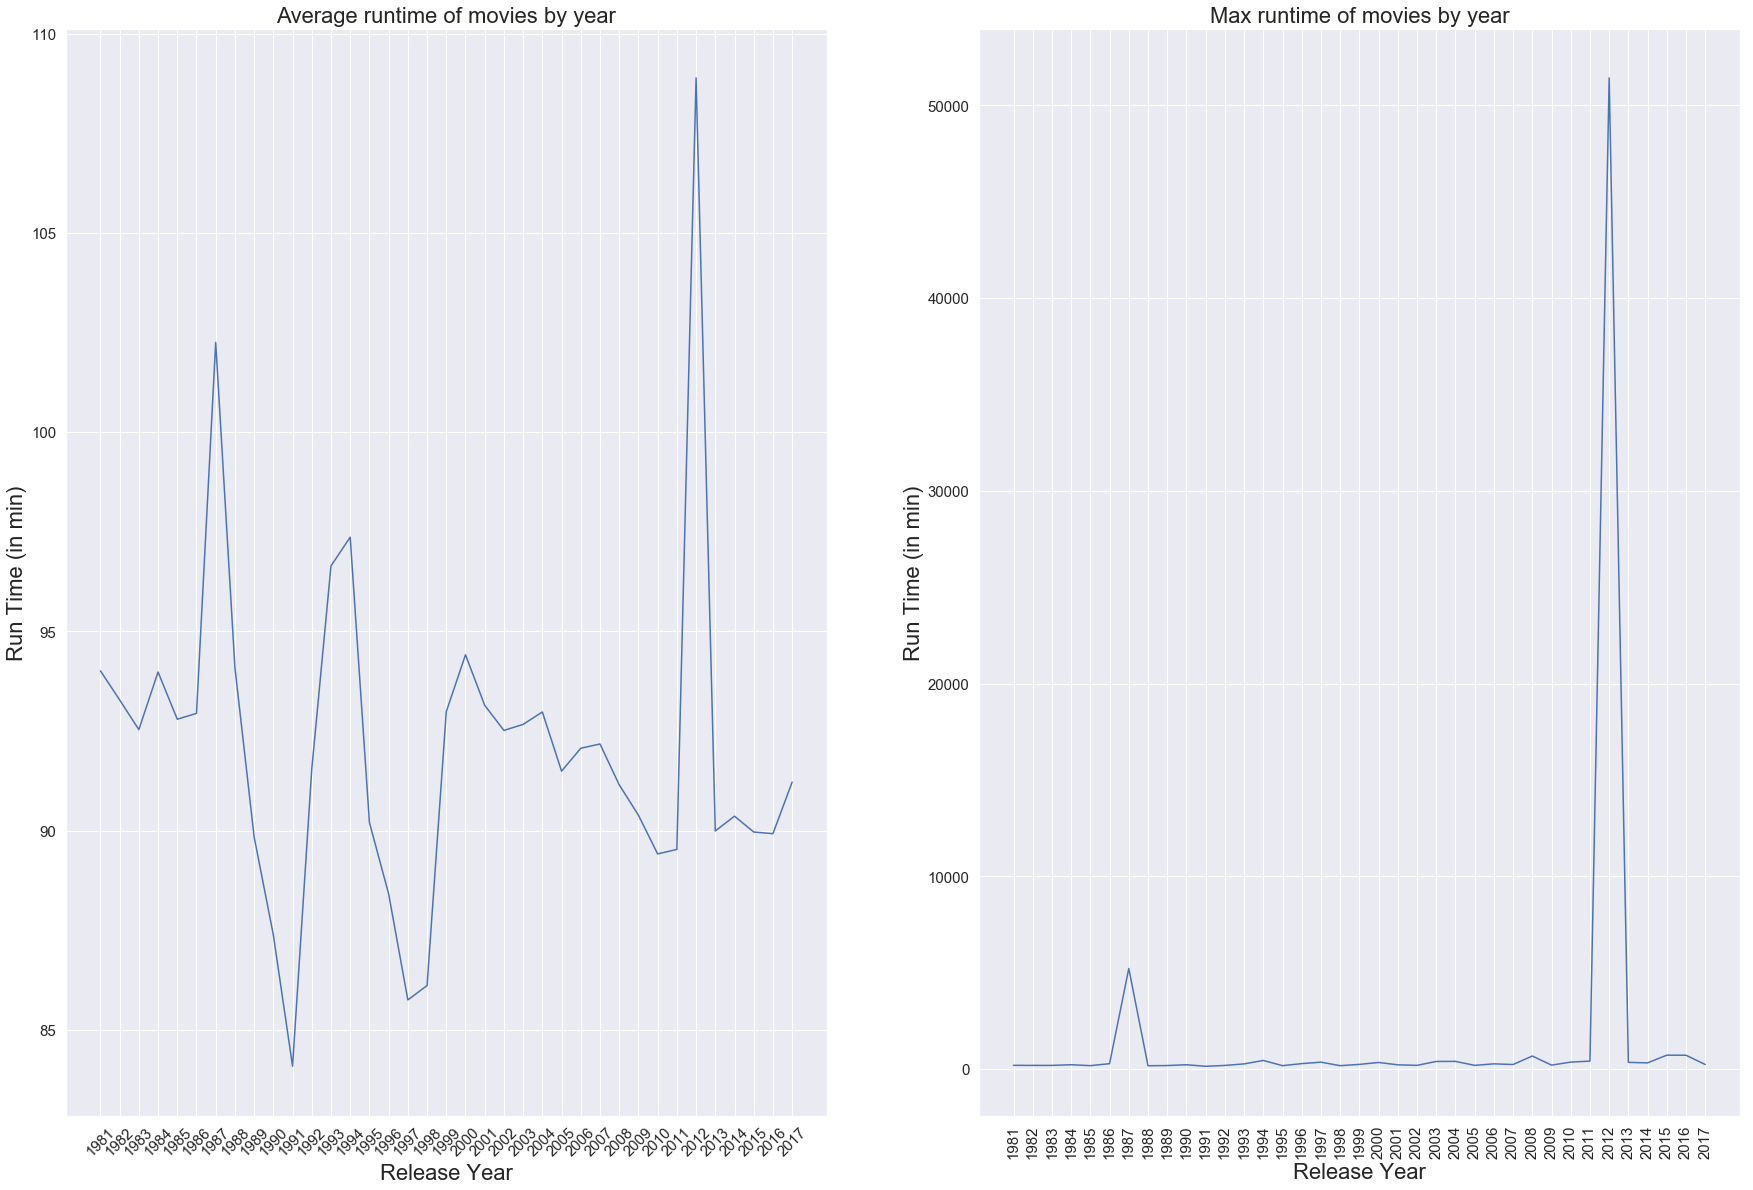

In [50]:
# Trend of Maximum runtime of movies 

plt.figure(figsize=(30,20))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.subplot(1,2,1)
t.groupby('startYear')['runtimeMinutes'].mean().plot()
plt.ylabel('Run Time (in min)',fontsize=22)
plt.xlabel('Release Year',fontsize=22)
plt.xticks(np.arange(min(t['startYear']), max(t['startYear'])+1, 1.0),rotation=45)
plt.title('Average runtime of movies by year',fontsize=22)

plt.subplot(1,2,2)
t.groupby('startYear')['runtimeMinutes'].max().plot()
plt.ylabel('Run Time (in min)',fontsize=22)
plt.xlabel('Release Year',fontsize=22)
plt.xticks(np.arange(min(t['startYear']), max(t['startYear'])+1, 1.0),rotation=90)
plt.title('Max runtime of movies by year',fontsize=22)

In [10]:
# Due to variability in data before 1999, only titles released after 1999 are to be considered

#Filtering out data after 1999: titles_crew
titles_crew=titles_crew_pre[titles_crew_pre.startYear>=1999]

# Drop rows with number of votes less than or equal to 10 and runtime minutes more than 240
titles_crew=titles_crew.drop((titles_crew[(titles_crew.numVotes<=10) | (titles_crew.runtimeMinutes>240)]).index).reset_index(drop=True)
titles_crew.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,title,region,language,averageRating,numVotes,nconst,category,primaryName,birthYear,deathYear,primaryProfession
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,73337,nm0107463,editor,David Brenner,NaN,NaN,"editor,editorial_department"
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,73337,nm0000212,actress,Meg Ryan,1961.0,NaN,"actress,producer,soundtrack"
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,73337,nm0413168,actor,Hugh Jackman,1968.0,NaN,"actor,soundtrack,producer"
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,73337,nm0000630,actor,Liev Schreiber,1967.0,NaN,"actor,producer,miscellaneous"
4,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,73337,nm0005227,actor,Breckin Meyer,1974.0,NaN,"actor,writer,producer"


In [11]:
titles_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311444 entries, 0 to 311443
Data columns (total 18 columns):
tconst               311444 non-null object
titleType            311444 non-null object
primaryTitle         311444 non-null object
originalTitle        311444 non-null object
startYear            311444 non-null int64
runtimeMinutes       292099 non-null float64
genres               307686 non-null object
title                311444 non-null object
region               311444 non-null object
language             2180 non-null object
averageRating        311444 non-null float64
numVotes             311444 non-null int64
nconst               311444 non-null object
category             311444 non-null object
primaryName          311413 non-null object
birthYear            114957 non-null float64
deathYear            7591 non-null float64
primaryProfession    300927 non-null object
dtypes: float64(4), int64(2), object(12)
memory usage: 42.8+ MB


In [12]:
# Create a new dataset from titles containing single row for each movie title: titles

titles=titles_crew.iloc[:,[0,4,5,6,10,11]].drop_duplicates().reset_index(drop=True)
titles['roundRating']=titles['averageRating'].round() 
titles.head()

,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes,roundRating
0,tt0035423,2001,118.0,"Comedy,Fantasy,Romance",6.4,73337,6.0
1,tt0088751,2005,100.0,"Comedy,Horror,Sci-Fi",5.8,179,6.0
2,tt0108549,2004,96.0,"Comedy,Mystery",7.7,23,8.0
3,tt0111068,1999,127.0,"Action,Drama,Thriller",7.1,4740,7.0
4,tt0112502,2017,NaN,"Horror,Thriller",4.0,33,4.0


In [13]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 7 columns):
tconst            34917 non-null object
startYear         34917 non-null int64
runtimeMinutes    32642 non-null float64
genres            34449 non-null object
averageRating     34917 non-null float64
numVotes          34917 non-null int64
roundRating       34917 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.9+ MB


Text(0.5,1,'Ratings distribution')

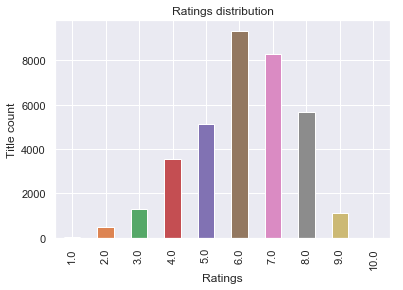

In [14]:
# Plot a graph of ratings for all the movies for all years under consideration

titles.groupby('roundRating')['tconst'].count().plot(kind='bar')
plt.ylabel('Title count')
plt.xlabel('Ratings')
plt.title('Ratings distribution')

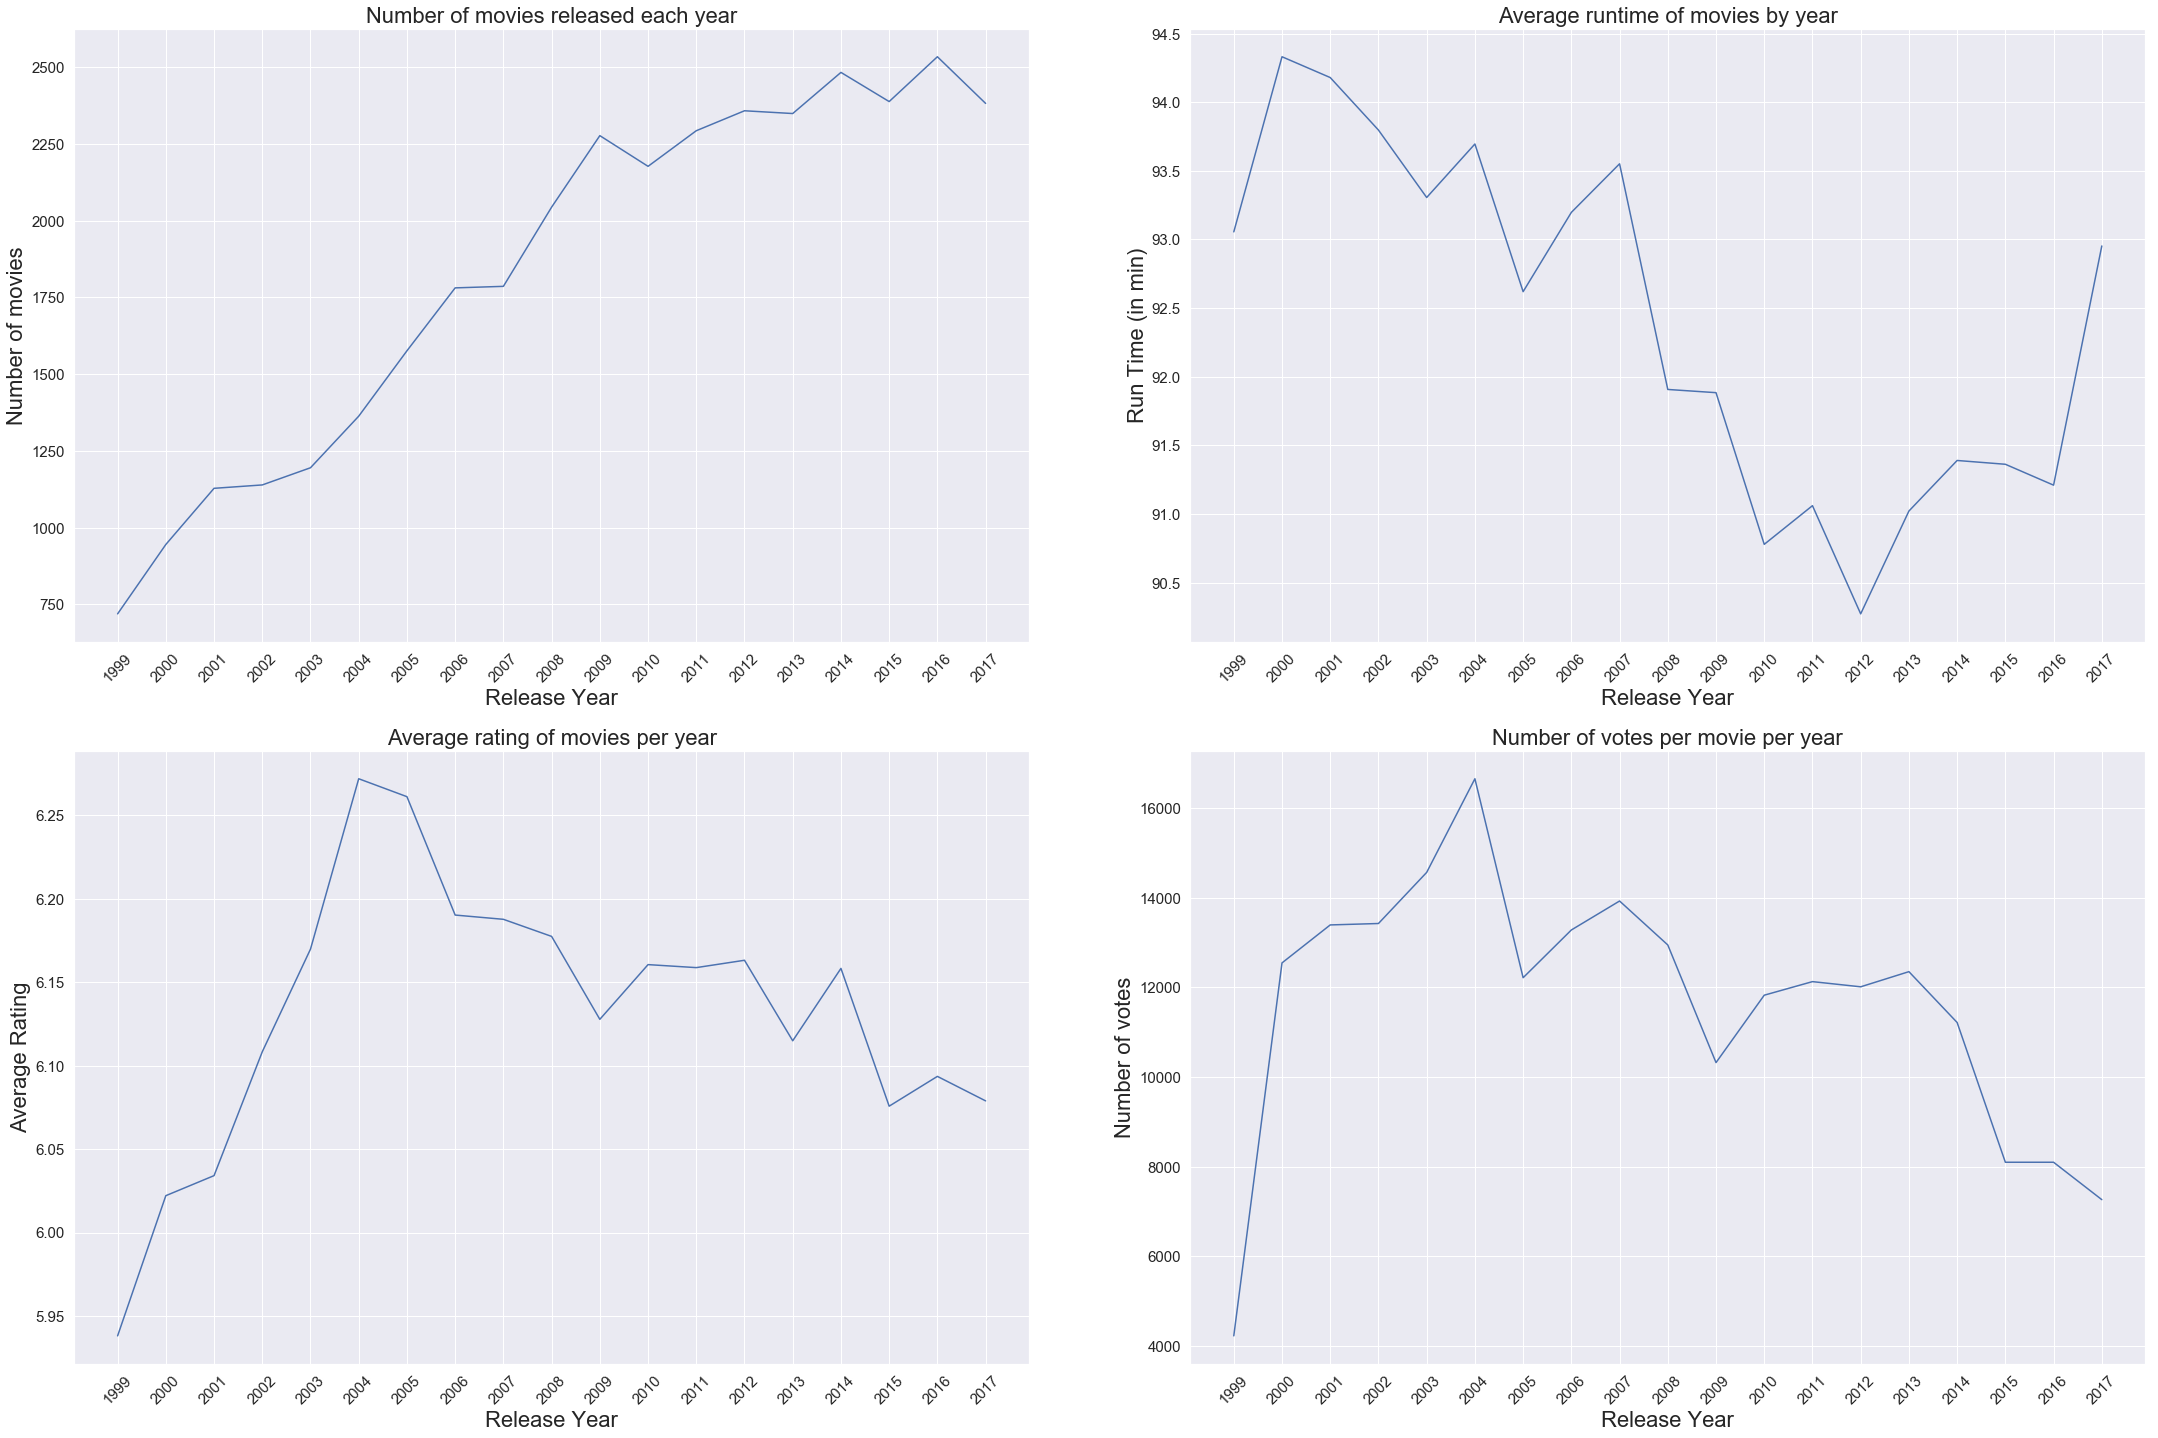

In [54]:
# Yearwise trends for different features

plt.figure(figsize=(30,20))
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.subplot(2,2,2)
titles.groupby('startYear')['runtimeMinutes'].mean().plot()
plt.ylabel('Run Time (in min)',fontsize=22)
plt.xlabel('Release Year',fontsize=22)
plt.xticks(np.arange(min(titles['startYear']), max(titles['startYear'])+1, 1.0),rotation=45)
plt.title('Average runtime of movies by year',fontsize=22)

plt.subplot(2,2,1)
titles.groupby('startYear')['tconst'].count().plot()
plt.xlabel('Release Year',fontsize=22)
plt.ylabel('Number of movies',fontsize=22)
plt.xticks(np.arange(min(titles['startYear']), max(titles['startYear'])+1, 1.0),rotation=45)
plt.title('Number of movies released each year',fontsize=22)

plt.subplot(2,2,3)
titles.groupby('startYear')['averageRating'].mean().plot()
plt.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)
plt.xlabel('Release Year',fontsize=22)
plt.ylabel('Average Rating',fontsize=22)
plt.xticks(np.arange(min(titles['startYear']), max(titles['startYear'])+1, 1.0),rotation=45)
plt.title('Average rating of movies per year',fontsize=22)

plt.subplot(2,2,4)
titles.groupby('startYear')['numVotes'].mean().plot()
plt.xlabel('Release Year',fontsize=22)
plt.ylabel('Number of votes',fontsize=22)
plt.title('Number of votes per movie per year',fontsize=22)
plt.xticks(np.arange(min(titles['startYear']), max(titles['startYear'])+1, 1.0),rotation=45)

plt.tight_layout(pad=.4, w_pad=4.0, h_pad=1.0)


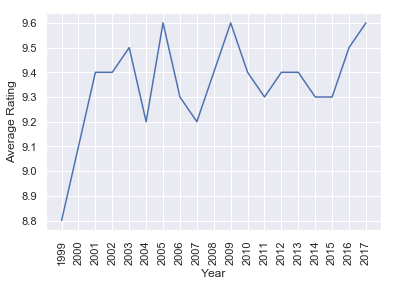

In [16]:
titles.groupby('startYear')['averageRating'].max().plot()
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(np.arange(min(titles['startYear']), max(titles['startYear'])+1, 1.0),rotation=90)
plt.show()

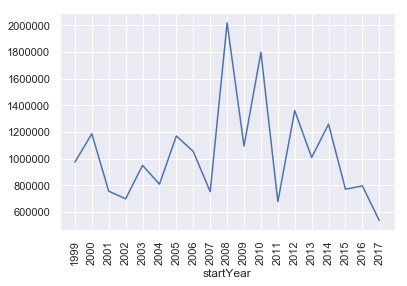

In [17]:
titles.groupby('startYear')['numVotes'].max().plot()
plt.xticks(np.arange(min(titles['startYear']), max(titles['startYear'])+1, 1.0),rotation=90)
plt.show()

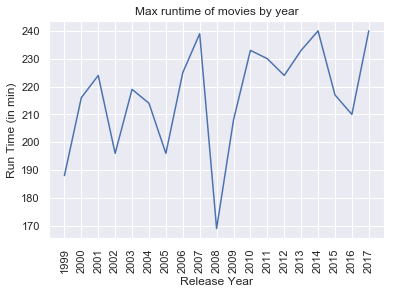

In [18]:
titles.groupby('startYear')['runtimeMinutes'].max().plot()
plt.ylabel('Run Time (in min)')
plt.xlabel('Release Year')
plt.xticks(np.arange(min(titles['startYear']), max(titles['startYear'])+1, 1.0),rotation=90)
plt.title('Max runtime of movies by year')
plt.show()

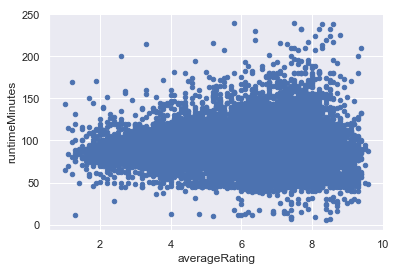

In [19]:
titles.plot(x='averageRating', y='runtimeMinutes',kind='scatter')

In [20]:
titles.to_csv('titles.csv')
titles_crew.to_csv('titles_crew.csv')